# **Klasifikasi Posyandu**






#**1. LOAD DATA**

In [ ]:
# Load library yang diperlukan
import pandas as pd

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1IQcPwyX_YSgA0Cglx92hcpXsYN2v5JkH/export?format=csv')

In [ ]:
# Display data
df

,Timestamp,Kecamatan,Kelurahan,RW,Nama Posyandu,Nama Ketua Kader Posyandu,No HP yang dapat dihubungi,Strata Posyandu,Jumlah Semua Kader Posyandu,Jumlah Sasaran Bayi (0-11 bulan),...,"Kepemilikan Buku Daftar Bantuan (minimal berisi: nomer, tanggal terima, nama penyumbang / pemberi bantuan, jenis bantuan, jumlah, dan keterangan)",Kepemilikan Buku Tamu Posyandu,"Kepemilikan Buku Kunjungan Rumah (berisi rincian kegiatan kunjungan rumah dengan petugas kesehatan ke sasaran yang sudah lama tidak datang posyandu, balita kurang gizi, dll)",Kepemilikan buku kas posyandu,Kepemilikan face shield untuk setiap kader posyandu yang bertugas,Kepemilikan masker oleh setiap kader yang bertugas,Persediaan masker,Ketersediaan Hand Sanitizer,Ketersediaan sarana cuci tangan,Ketersediaan Thermogun
0,7/23/20 12:50,Kecamatan Banyumanik,Banyumanik,1,ANGGREK BULAN,PRINARTI,82328436431,Mandiri,5'-9,0-25,...,"Ada, data belum terbaru (update)","Ada, data terisi lengkap","Ada, data terisi lengkap","Ada, dokumen belum update (terbaru)","Ada, terpenuhi semua",Ada,Tidak tersedia,Ada,Ada,"Tersedia, pinjam"
1,7/22/20 13:21,Kecamatan Banyumanik,Banyumanik,2,LESTARI,Yayuk desti SPd,896374866952,Purnama,≥ 10,26-50,...,"Ada, data sudah terbaru (update)","Ada, data terisi lengkap","Ada, data tidak lengkap","Ada, dokumen sudah update","Ada, terpenuhi semua",Ada,Tidak tersedia,Ada,Ada,"Tersedia, inventaris posyandu"
2,7/23/20 19:33,Kecamatan Banyumanik,Banyumanik,3,kenanga,primah,628133062831,Purnama,≥ 10,0-25,...,"Ada, data sudah terbaru (update)","Ada, data terisi lengkap","Ada, data terisi lengkap","Ada, dokumen sudah update","Ada, terpenuhi semua",Ada,"Tersedia, dalam jumlah mencukupi",Ada,Ada,"Tersedia, inventaris posyandu"
3,7/22/20 14:06,Kecamatan Banyumanik,Banyumanik,4,NUSA INDAH,Sumiyati,85875102486,Purnama,≥ 10,0-25,...,"Ada, data belum terbaru (update)","Ada, data terisi lengkap","Ada, data tidak lengkap","Ada, dokumen belum update (terbaru)","Ada, terpenuhi semua",Ada,"Tersedia, dalam jumlah mencukupi",Ada,Ada,"Tersedia, milik kelurahan/RW, digunakan bergan..."
4,7/22/20 11:45,Kecamatan Banyumanik,Banyumanik,5,Margo Utomo RW. 05 Banyumanik,Ichna Suciati,85290688876,Purnama,≥ 10,0-25,...,"Ada, data sudah terbaru (update)","Ada, data terisi lengkap","Ada, data tidak lengkap","Ada, dokumen sudah update","Ada, terpenuhi semua",Ada,"Tersedia, dalam jumlah mencukupi",Ada,Ada,"Tersedia, inventaris posyandu"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,7/22/20 8:57,Kecamatan Tugu,Mangkang Wetan,7,Kuncup mekar 7B,Masfuah,89670749630,Purnama,≥ 10,0-25,...,"Ada, data sudah terbaru (update)","Ada, data terisi lengkap","Ada, data terisi lengkap","Ada, dokumen sudah update",Tidak ada,Ada,Tidak tersedia,Ada,Ada,Tidak Ada
1525,8/13/20 11:57,Kecamatan Tugu,Randugarut,1,Margowidodo 1,Nur Hikmah,895354993671,Purnama,≥ 10,0-25,...,"Ada, data sudah terbaru (update)","Ada, data terisi lengkap","Ada, data terisi lengkap","Ada, dokumen sudah update","Ada, terpenuhi semua",Ada,"Tersedia, dalam jumlah mencukupi",Ada,Ada,Tidak Ada
1526,8/13/20 18:08,Kecamatan Tugu,Randugarut,2,Margowidodo 2,Hariyani,81914451875,Purnama,≥ 10,0-25,...,"Ada, data sudah terbaru (update)","Ada, data terisi lengkap","Ada, data terisi lengkap","Ada, dokumen sudah update","Ada, terpenuhi semua",Ada,"Tersedia, dalam jumlah mencukupi",Ada,Ada,Tidak Ada
1527,8/2/20 8:48,Kecamatan Tugu,Tugurejo,3,Melati 3,Hj Fathiroh,87832385957,Purnama,≥ 10,0-25,...,"Ada, data sudah terbaru (update)","Ada, data terisi lengkap","Ada, data tidak lengkap","Ada, dokumen sudah update","Ada, terpenuhi semua",Ada,Tidak tersedia,Ada,Ada,Tidak Ada


#**2. EDA**

In [ ]:
# Display an information of the dataset file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 44 columns):
 #   Column                                                                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                                                                                                               1529 non-null   object
 1   Kecamatan                                                                                                                                                                                               1529

In [ ]:
# Display a description of the dataset file
df.describe()

,RW,No HP yang dapat dihubungi
count,1529.000000,1.529000e+03
mean,5.979725,7.025887e+11
std,4.938388,2.088064e+13
min,1.000000,0.000000e+00
25%,2.000000,8.132808e+10
50%,5.000000,8.383895e+10
75%,8.000000,8.579995e+10
max,32.000000,8.162877e+14


##**2.1 Data Distribution**

##**2.2 Jumlah Posyandu di Setiap Kecamatan**

<ipython-input-7-d8dcb019553d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jumlah_posyandu_per_kecamatan.index, y=jumlah_posyandu_per_kecamatan.values, palette='viridis')


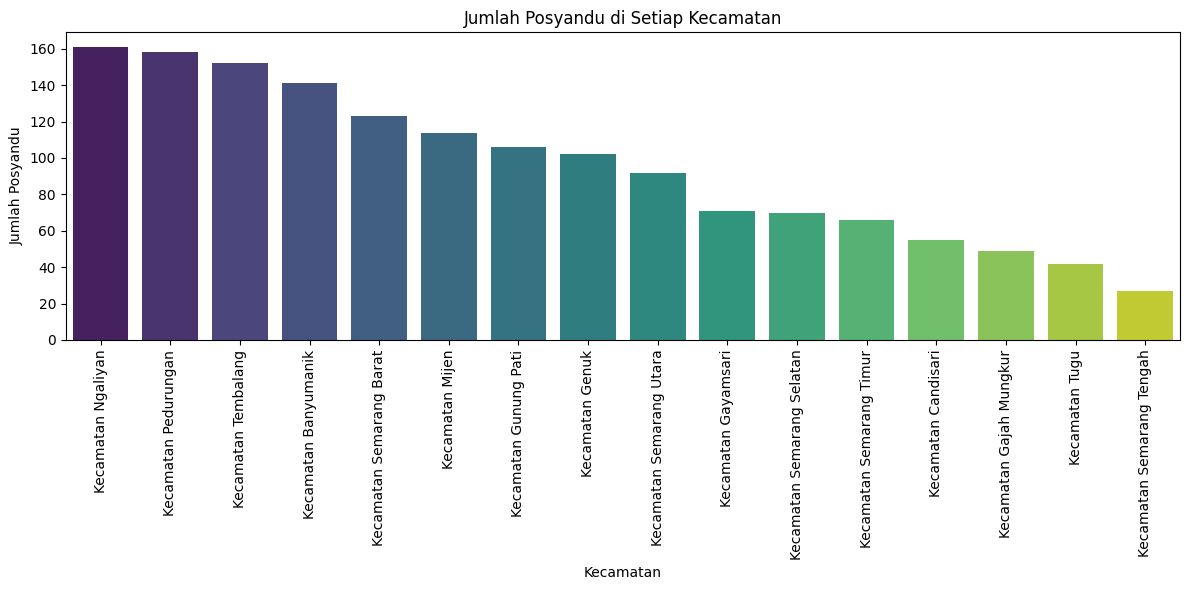

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Langkah 2: Menghitung jumlah Posyandu per Kecamatan
jumlah_posyandu_per_kecamatan = df['Kecamatan'].value_counts()

# Langkah 3: Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=jumlah_posyandu_per_kecamatan.index, y=jumlah_posyandu_per_kecamatan.values, palette='viridis')
plt.title('Jumlah Posyandu di Setiap Kecamatan')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah Posyandu')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **3. CLEANING DATA**

## **3.1 Cek Missing Value**

In [ ]:
nan_count = df.isnull().sum().reset_index(name='nan')
data_types = df.dtypes.reset_index(name='dtype')

result = pd.merge(nan_count, data_types, on='index')
result


,index,nan,dtype
0,Timestamp,0,object
1,Kecamatan,0,object
2,Kelurahan,0,object
3,RW,0,int64
4,Nama Posyandu,0,object
5,Nama Ketua Kader Posyandu,0,object
6,No HP yang dapat dihubungi,0,int64
7,Strata Posyandu,0,object
8,Jumlah Semua Kader Posyandu,0,object
9,Jumlah Sasaran Bayi (0-11 bulan),0,object


## **3.2 Cek Duplicate Value**

In [ ]:
# Displaying duplicate data
duplicate_rows = df.duplicated()
print("All Duplicate Rows:")
df[df.duplicated(keep=False)]

All Duplicate Rows:


,Timestamp,Kecamatan,Kelurahan,RW,Nama Posyandu,Nama Ketua Kader Posyandu,No HP yang dapat dihubungi,Strata Posyandu,Jumlah Semua Kader Posyandu,Jumlah Sasaran Bayi (0-11 bulan),...,"Kepemilikan Buku Daftar Bantuan (minimal berisi: nomer, tanggal terima, nama penyumbang / pemberi bantuan, jenis bantuan, jumlah, dan keterangan)",Kepemilikan Buku Tamu Posyandu,"Kepemilikan Buku Kunjungan Rumah (berisi rincian kegiatan kunjungan rumah dengan petugas kesehatan ke sasaran yang sudah lama tidak datang posyandu, balita kurang gizi, dll)",Kepemilikan buku kas posyandu,Kepemilikan face shield untuk setiap kader posyandu yang bertugas,Kepemilikan masker oleh setiap kader yang bertugas,Persediaan masker,Ketersediaan Hand Sanitizer,Ketersediaan sarana cuci tangan,Ketersediaan Thermogun


df.info()

## **3.3Hapus Kolom yang tidak perlu**

In [ ]:
df.drop(['Timestamp','Kecamatan','Kelurahan','RW','Nama Posyandu','Nama Ketua Kader Posyandu','No HP yang dapat dihubungi','Strata Posyandu','Jumlah Sasaran Bayi (0-11 bulan)','Jumlah Sasaran Balita (12-59 bulan)','Jumlah sasaran ibu hamil','Jumlah PUS (Pasangan Usia Subur)','Jumlah Wanita Usia Subur/WUS (usia 15-49 tahun)','Jumlah Wanita Usia Subur/WUS (usia 15-49 tahun)','Tempat Pelayanan Posyandu','Bila ada, sebutkan nama akun media sosial posyandu', 'Kepemilikan Timbangan Bayi', 'Kepemilikan Balok SKDN','Kepemilikan media informasi, komunikasi dan edukasi kesehatan untuk sasaran, dalam bentuk poster/leaflet/lembar balik dan lainnya'], axis=1, inplace=True)

In [ ]:
dataClean = df
print(dataClean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 26 columns):
 #   Column                                                                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                  --------------  ----- 
 0   Jumlah Semua Kader Posyandu                                                                                                                                                                             1529 non-null   object
 1   Apakah tempat pelayanan Posyandu tersebut permanen (tidak ada potensi berpindah tempat karena suatu kondisi tertentu)                                                                                   1529

## **3.4 Mengganti Nama Kolom**

In [ ]:
dataClean.rename(columns={
    'Apakah tempat pelayanan Posyandu tersebut permanen (tidak ada potensi berpindah tempat karena suatu kondisi tertentu)': 'Apakah tempat pelayanan Posyandu tersebut permanen',
    'Kepemilikan akun media sosial untuk posyandu (instagram, facebook, twitter, atau lainnya)': 'Kepemilikan akun media sosial untuk posyandu',
    'Kepemilikan buku KIA oleh sasaran (Buku KIA adalah buku yang berisi tentang catatan kesehatan ibu hamil, ibu melahirkan, ibu nifas, anak (baru berusia 0 sampai 6 bulan)': 'Kepemilikan buku KIA oleh sasaran',
    'Kepemilikan Buku Kegiatan Posyandu (berisikan tanggal kegiatan, dan uraian kegiatan posyandu yang dilaksanakan)': 'Kepemilikan Buku Kegiatan Posyandu',
    'Kepemilikan Buku Notulen Rapat (buku yang berisikan waktu, tempat, rapat, pokok bahasan, pimpinan rapat, jumlah yang diundang, jumlah yang hadir, susunan acara, uraian jalannya rapat, dan lain-lain)': 'Kepemilikan Buku Notulen Rapat',
    'Kepemilikan Buku Daftar Bantuan (minimal berisi: nomer, tanggal terima, nama penyumbang / pemberi bantuan, jenis bantuan, jumlah, dan keterangan)': 'Kepemilikan Buku Daftar Bantuan',
    'Kepemilikan Buku Kunjungan Rumah (berisi rincian kegiatan kunjungan rumah dengan petugas kesehatan ke sasaran yang sudah lama tidak datang posyandu, balita kurang gizi, dll)': 'Kepemilikan Buku Kunjungan Rumah'
    # Tambahkan kolom lain yang ingin diganti
}, inplace=True)

In [ ]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 26 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Jumlah Semua Kader Posyandu                                        1529 non-null   object
 1   Apakah tempat pelayanan Posyandu tersebut permanen                 1529 non-null   object
 2   Kepemilikan akun media sosial untuk posyandu                       1529 non-null   object
 3   Kepemilikan Timbangan Dacin                                        1529 non-null   object
 4   Kepemilikan Timbangan digital                                      1529 non-null   object
 5   Kepemilikan Timbangan dengan jarum                                 1529 non-null   object
 6   Kepemilikan Pengkur Panjang Badan                                  1529 non-null   object
 7   Kepemilikan Pengukur Tinggi Badan

## **3.5 Membuat Label untuk Klasifikasi**

In [ ]:
def create_labels(row):
    labels = {}

    # Label untuk jumlah kader posyandu
    if row['Jumlah Semua Kader Posyandu'] in ['5-9', '≥ 10']:
        labels['label_Jumlah Semua Kader Posyandu'] = 'Baik'
    else:
        labels['label_Jumlah Semua Kader Posyandu'] = 'Kurang'

    # Label untuk tempat pelayanan permanen
    if row['Apakah tempat pelayanan Posyandu tersebut permanen'] == 'Ya':
        labels['label_Apakah tempat pelayanan Posyandu tersebut permanen'] = 'Baik'
    else:
        labels['label_Apakah tempat pelayanan Posyandu tersebut permanen'] = 'Kurang'

    # Label untuk kepemilikan akun media sosial
    if row['Kepemilikan akun media sosial untuk posyandu'] == 'Ya':
        labels['label_Kepemilikan akun media sosial untuk posyandu'] = 'Baik'
    else:
        labels['label_Kepemilikan akun media sosial untuk posyandu'] = 'Kurang'

    # Label untuk kepemilikan Timbangan Dacin
    if row['Kepemilikan Timbangan Dacin'] in ['Ada, berfungsi dengan baik', 'Ada, tidak berfungsi']:
        labels['label_Kepemilikan Timbangan Dacin'] = 'Baik'
    else:
        labels['label_Kepemilikan Timbangan Dacin'] = 'Kurang'

    # Label untuk kepemilikan Timbangan Digital
    if row['Kepemilikan Timbangan digital'] in ['Ada, berfungsi dengan baik', 'Ada, tidak berfungsi']:
        labels['label_Kepemilikan Timbangan digital'] = 'Baik'
    else:
        labels['label_Kepemilikan Timbangan digital'] = 'Kurang'

    # Label untuk kepemilikan Timbangan Dengan Jarum
    if row['Kepemilikan Timbangan dengan jarum'] in ['Ada, berfungsi dengan baik', 'Ada, tidak berfungsi']:
        labels['label_Kepemilikan Timbangan dengan jarum'] = 'Baik'
    else:
        labels['label_Kepemilikan Timbangan dengan jarum'] = 'Kurang'

    # Label untuk kepemilikan Pengukur Panjang Badan
    if row['Kepemilikan Pengkur Panjang Badan'] in ['Ada, berfungsi dengan baik', 'Ada, tidak berfungsi']:
        labels['label_Kepemilikan Pengkur Panjang Badan'] = 'Baik'
    else:
        labels['label_Kepemilikan Pengkur Panjang Badan'] = 'Kurang'

    # Label untuk kepemilikan Pengukur Tinggi Badan
    if row['Kepemilikan Pengukur Tinggi Badan'] in ['Ada, terpasang permanen di tempat posyandu', 'Ada, dipasang hanya saat kegiatan posyandu']:
        labels['label_Kepemilikan Pengukur Tinggi Badan'] = 'Baik'
    else:
        labels['label_Kepemilikan Pengukur Tinggi Badan'] = 'Kurang'

    # Label untuk kepemilikan Alat Ukur Tinggi Badan yang Ditempel
    if row['Kepemilikan Alat Ukur Tinggi Badan yang ditempel'] in ['Ada, dimanfaatkan dengan baik', 'Ada, kadang dimanfaatkan']:
        labels['label_Kepemilikan Alat Ukur Tinggi Badan yang ditempel'] = 'Baik'
    else:
        labels['label_Kepemilikan Alat Ukur Tinggi Badan yang ditempel'] = 'Kurang'

    # Label untuk kepemilikan Alat Ukur Lingkar Lengan Atas (LILA)
    if row['Kepemilikan Alat Ukur Lingkar Lengan Atas (LILA)'] in ['Ada, jumlah memadai', 'Ada, jumlah terbatas']:
        labels['label_Kepemilikan Alat Ukur Lingkar Lengan Atas (LILA)'] = 'Baik'
    else:
        labels['label_Kepemilikan Alat Ukur Lingkar Lengan Atas (LILA)'] = 'Kurang'

    # Label untuk kepemilikan Buku KIA
    if row['Kepemilikan buku KIA oleh sasaran'] in ['Ya, semua sasaran', 'Ya, sebagian sasaran']:
        labels['label_Kepemilikan buku KIA oleh sasaran'] = 'Baik'
    else:
        labels['label_Kepemilikan buku KIA oleh sasaran'] = 'Kurang'

    # Label untuk Kepemilikan Buku Susunan Pengurus
    if row['Kepemilikan Buku/dokumen terkait Susunan Pengurus'] in ['Ada, dokumen belum update (terbaru)', 'Ada, dokumen sudah update']:
        labels['label_Kepemilikan Buku/dokumen terkait Susunan Pengurus'] = 'Baik'
    else:
        labels['label_Kepemilikan Buku/dokumen terkait Susunan Pengurus'] = 'Kurang'

    # Label untuk Kepemilikan Buku Kehadiran Kader
    if row['Kepemilikan Buku Kehadiran Kader di posyandu'] in ['Ada, terisi lengkap tiap bulan', 'Ada, tidak terisi lengkap']:
        labels['label_Kepemilikan Buku Kehadiran Kader di posyandu'] = 'Baik'
    else:
        labels['label_Kepemilikan Buku Kehadiran Kader di posyandu'] = 'Kurang'

    # Label untuk Kepemilikan Buku Kegiatan Posyandu
    if row['Kepemilikan Buku Kegiatan Posyandu'] in ['Ada, terisi lengkap tiap bulan', 'Ada, tidak terisi lengkap']:
        labels['label_Kepemilikan Buku Kegiatan Posyandu'] = 'Baik'
    else:
        labels['label_Kepemilikan Buku Kegiatan Posyandu'] = 'Kurang'

    # Label untuk Kepemilikan Buku Notulen Rapat
    if row['Kepemilikan Buku Notulen Rapat'] in ['Ada, terisi lengkap','Ada, tidak lengkap']:
        labels['label_Kepemilikan Buku Notulen Rapat'] = 'Baik'
    else:
        labels['label_Kepemilikan Buku Notulen Rapat'] = 'Kurang'

    # Label untuk Kepemilikan Buku Inventaris
    if row['Kepemilikan Buku Inventaris'] in ['Ada, dokumen belum update (terbaru)', 'Ada, dokumen sudah update']:
        labels['label_Kepemilikan Buku Inventaris'] = 'Baik'
    else:
        labels['label_Kepemilikan Buku Inventaris'] = 'Kurang'

    # Label untuk Kepemilikan Buku Daftar Bantuan
    if row['Kepemilikan Buku Daftar Bantuan'] in ['Ada, data sudah terbaru (update)', 'Ada, data belum terbaru (update)']:
        labels['label_Kepemilikan Buku Daftar Bantuan'] = 'Baik'
    else:
        labels['label_Kepemilikan Buku Daftar Bantuan'] = 'Kurang'

    # Label untuk Kepemilikan Buku Tamu
    if row['Kepemilikan Buku Tamu Posyandu'] in ['Ada, data terisi lengkap', 'Ada, data tidak lengkap']:
        labels['label_Kepemilikan Buku Tamu Posyandu'] = 'Baik'
    else:
        labels['label_Kepemilikan Buku Tamu Posyandu'] = 'Kurang'

    # Label untuk Kepemilikan Buku Kunjungan Rumah
    if row['Kepemilikan Buku Kunjungan Rumah'] in ['Ada, data terisi lengkap', 'Ada, data tidak lengkap']:
        labels['label_Kepemilikan Buku Kunjungan Rumah'] = 'Baik'
    else:
        labels['label_Kepemilikan Buku Kunjungan Rumah'] = 'Kurang'

    # Label untuk Kepemilikan Buku Kas Posyandu
    if row['Kepemilikan buku kas posyandu'] in ['Ada, dokumen belum update (terbaru)', 'Ada, dokumen sudah update']:
        labels['label_Kepemilikan buku kas posyandu'] = 'Baik'
    else:
        labels['label_Kepemilikan buku kas posyandu'] = 'Kurang'

    # Label untuk Kepemilikan Face Shield
    if row['Kepemilikan face shield untuk setiap kader posyandu yang bertugas'] in ['Ada, terpenuhi semua', 'Ada, belum terpenuhi semua']:
        labels['label_Kepemilikan face shield untuk setiap kader posyandu yang bertugas'] = 'Baik'
    else:
        labels['label_Kepemilikan face shield untuk setiap kader posyandu yang bertugas'] = 'Kurang'

    # Label untuk Kepemilikan Masker
    if row['Kepemilikan masker oleh setiap kader yang bertugas'] == 'Ada':
        labels['label_Kepemilikan masker oleh setiap kader yang bertugas'] = 'Baik'
    else:
        labels['label_Kepemilikan masker oleh setiap kader yang bertugas'] = 'Kurang'

    # Label untuk Persediaan Masker
    if row['Persediaan masker'] in ['Tersedia, dalam jumlah cukup', 'Tersedia, belum cukup']:
        labels['label_Persediaan masker'] = 'Baik'
    else:
        labels['label_Persediaan masker'] = 'Kurang'

    # Label untuk Ketersediaan Hand Sanitizer
    if row['Ketersediaan Hand Sanitizer'] == 'Ada':
        labels['label_Ketersediaan Hand Sanitizer'] = 'Baik'
    else:
        labels['label_Ketersediaan Hand Sanitizer'] = 'Kurang'

    # Label untuk Ketersediaan Sarana Cuci Tangan
    if row['Ketersediaan sarana cuci tangan'] == 'Ada':
        labels['label_Ketersediaan sarana cuci tangan'] = 'Baik'
    else:
        labels['label_Ketersediaan sarana cuci tangan'] = 'Kurang'

    # Label untuk Ketersediaan Thermogun
    if row['Ketersediaan Thermogun'] in ['Tersedia, inventaris posyandu', 'Tersedia, pinjam']:
        labels['label_Ketersediaan Thermogun'] = 'Baik'
    else:
        labels['label_Ketersediaan Thermogun'] = 'Kurang'

    return pd.Series(labels)

# Menambahkan kolom label ke DataFrame
df_labels = df.apply(create_labels, axis=1)

# Menggabungkan DataFrame asli dengan DataFrame label
df_combined = pd.concat([dataClean, df_labels], axis=1)

# Tampilkan DataFrame dengan label baru
print(df_combined)

     Jumlah Semua Kader Posyandu  \
0                           5'-9   
1                           ≥ 10   
2                           ≥ 10   
3                           ≥ 10   
4                           ≥ 10   
...                          ...   
1524                        ≥ 10   
1525                        ≥ 10   
1526                        ≥ 10   
1527                        ≥ 10   
1528                        5'-9   

     Apakah tempat pelayanan Posyandu tersebut permanen  \
0                                                    Ya   
1                                                    Ya   
2                                                    Ya   
3                                                    Ya   
4                                                    Ya   
...                                                 ...   
1524                                                 Ya   
1525                                              Tidak   
1526                                

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 52 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Jumlah Semua Kader Posyandu                                              1529 non-null   object
 1   Apakah tempat pelayanan Posyandu tersebut permanen                       1529 non-null   object
 2   Kepemilikan akun media sosial untuk posyandu                             1529 non-null   object
 3   Kepemilikan Timbangan Dacin                                              1529 non-null   object
 4   Kepemilikan Timbangan digital                                            1529 non-null   object
 5   Kepemilikan Timbangan dengan jarum                                       1529 non-null   object
 6   Kepemilikan Pengkur Panjang Badan                                        1529 no

## **3.6 Membuat Label Target**

membuat label target dengan presentase 75% dari semua label tiap fitur

In [ ]:
def create_target_label(row):
    # Menghitung jumlah label yang "Baik"
    baik_count = sum(1 for label in row.index if label.startswith('label_') and row[label] == 'Baik')

    # Menghitung total label yang diperiksa
    total_labels = sum(1 for label in row.index if label.startswith('label_'))

    # Menghitung persentase label yang "Baik"
    if total_labels > 0:  # Pastikan tidak membagi dengan nol
        percentage_baik = baik_count / total_labels
    else:
        percentage_baik = 0  # Jika tidak ada label, anggap persentase 0

    # Menentukan label target berdasarkan persentase
    if percentage_baik >= 0.75:
        return 'Baik'
    else:
        return 'Kurang'

# Tambahkan kolom label target ke DataFrame
df_combined['label_target'] = df_combined.apply(create_target_label, axis=1)

# Tampilkan DataFrame dengan label target baru
print(df_combined)

     Jumlah Semua Kader Posyandu  \
0                           5'-9   
1                           ≥ 10   
2                           ≥ 10   
3                           ≥ 10   
4                           ≥ 10   
...                          ...   
1524                        ≥ 10   
1525                        ≥ 10   
1526                        ≥ 10   
1527                        ≥ 10   
1528                        5'-9   

     Apakah tempat pelayanan Posyandu tersebut permanen  \
0                                                    Ya   
1                                                    Ya   
2                                                    Ya   
3                                                    Ya   
4                                                    Ya   
...                                                 ...   
1524                                                 Ya   
1525                                              Tidak   
1526                                

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 53 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Jumlah Semua Kader Posyandu                                              1529 non-null   object
 1   Apakah tempat pelayanan Posyandu tersebut permanen                       1529 non-null   object
 2   Kepemilikan akun media sosial untuk posyandu                             1529 non-null   object
 3   Kepemilikan Timbangan Dacin                                              1529 non-null   object
 4   Kepemilikan Timbangan digital                                            1529 non-null   object
 5   Kepemilikan Timbangan dengan jarum                                       1529 non-null   object
 6   Kepemilikan Pengkur Panjang Badan                                        1529 no

## **3.7 Menghapus Label tiap Fitur dan menyisakan Label Target**

In [ ]:
# Menghapus kolom yang memiliki prefiks 'label_' kecuali 'label_target'
df_combined = df_combined.loc[:, ~df_combined.columns.str.startswith('label_') | (df_combined.columns == 'label_target')]

# Tampilkan DataFrame setelah kolom dihapus
print(df_combined)

     Jumlah Semua Kader Posyandu  \
0                           5'-9   
1                           ≥ 10   
2                           ≥ 10   
3                           ≥ 10   
4                           ≥ 10   
...                          ...   
1524                        ≥ 10   
1525                        ≥ 10   
1526                        ≥ 10   
1527                        ≥ 10   
1528                        5'-9   

     Apakah tempat pelayanan Posyandu tersebut permanen  \
0                                                    Ya   
1                                                    Ya   
2                                                    Ya   
3                                                    Ya   
4                                                    Ya   
...                                                 ...   
1524                                                 Ya   
1525                                              Tidak   
1526                                

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 27 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Jumlah Semua Kader Posyandu                                        1529 non-null   object
 1   Apakah tempat pelayanan Posyandu tersebut permanen                 1529 non-null   object
 2   Kepemilikan akun media sosial untuk posyandu                       1529 non-null   object
 3   Kepemilikan Timbangan Dacin                                        1529 non-null   object
 4   Kepemilikan Timbangan digital                                      1529 non-null   object
 5   Kepemilikan Timbangan dengan jarum                                 1529 non-null   object
 6   Kepemilikan Pengkur Panjang Badan                                  1529 non-null   object
 7   Kepemilikan Pengukur Tinggi Badan

#**4. ENCODING**

## **4.1 Mengubah Tipe Data Object ke Numeric**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Mengonversi semua kolom yang bukan label target
for column in df_combined.columns:
    if df_combined[column].dtype == 'object':
        df_combined[column] = label_encoder.fit_transform(df_combined[column])

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 27 columns):
 #   Column                                                             Non-Null Count  Dtype
---  ------                                                             --------------  -----
 0   Jumlah Semua Kader Posyandu                                        1529 non-null   int64
 1   Apakah tempat pelayanan Posyandu tersebut permanen                 1529 non-null   int64
 2   Kepemilikan akun media sosial untuk posyandu                       1529 non-null   int64
 3   Kepemilikan Timbangan Dacin                                        1529 non-null   int64
 4   Kepemilikan Timbangan digital                                      1529 non-null   int64
 5   Kepemilikan Timbangan dengan jarum                                 1529 non-null   int64
 6   Kepemilikan Pengkur Panjang Badan                                  1529 non-null   int64
 7   Kepemilikan Pengukur Tinggi Badan         

In [ ]:
df_combined

,Jumlah Semua Kader Posyandu,Apakah tempat pelayanan Posyandu tersebut permanen,Kepemilikan akun media sosial untuk posyandu,Kepemilikan Timbangan Dacin,Kepemilikan Timbangan digital,Kepemilikan Timbangan dengan jarum,Kepemilikan Pengkur Panjang Badan,Kepemilikan Pengukur Tinggi Badan,Kepemilikan Alat Ukur Tinggi Badan yang ditempel,Kepemilikan Alat Ukur Lingkar Lengan Atas (LILA),...,Kepemilikan Buku Tamu Posyandu,Kepemilikan Buku Kunjungan Rumah,Kepemilikan buku kas posyandu,Kepemilikan face shield untuk setiap kader posyandu yang bertugas,Kepemilikan masker oleh setiap kader yang bertugas,Persediaan masker,Ketersediaan Hand Sanitizer,Ketersediaan sarana cuci tangan,Ketersediaan Thermogun,label_target
0,1,1,2,0,2,0,0,2,2,2,...,0,0,0,1,0,2,0,0,2,0
1,2,1,0,0,2,3,0,2,0,2,...,0,1,1,1,0,2,0,0,0,1
2,2,1,2,0,2,0,0,2,2,1,...,0,0,1,1,0,1,0,0,0,0
3,2,1,2,0,0,1,0,2,2,1,...,0,1,0,1,0,1,0,0,1,0
4,2,1,2,0,2,0,0,2,2,5,...,0,1,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,2,1,2,0,2,1,3,2,2,2,...,0,0,1,2,0,2,0,0,3,1
1525,2,0,2,1,0,1,3,2,0,1,...,0,0,1,1,0,1,0,0,3,1
1526,2,1,2,0,0,1,3,2,2,1,...,0,0,1,1,0,1,0,0,3,1
1527,2,1,0,1,2,0,3,4,0,1,...,0,1,1,1,0,2,0,0,3,1


## **4.2 Korelasi Antar Fitur**

In [ ]:
df_combined.corr()

,Jumlah Semua Kader Posyandu,Apakah tempat pelayanan Posyandu tersebut permanen,Kepemilikan akun media sosial untuk posyandu,Kepemilikan Timbangan Dacin,Kepemilikan Timbangan digital,Kepemilikan Timbangan dengan jarum,Kepemilikan Pengkur Panjang Badan,Kepemilikan Pengukur Tinggi Badan,Kepemilikan Alat Ukur Tinggi Badan yang ditempel,Kepemilikan Alat Ukur Lingkar Lengan Atas (LILA),...,Kepemilikan Buku Tamu Posyandu,Kepemilikan Buku Kunjungan Rumah,Kepemilikan buku kas posyandu,Kepemilikan face shield untuk setiap kader posyandu yang bertugas,Kepemilikan masker oleh setiap kader yang bertugas,Persediaan masker,Ketersediaan Hand Sanitizer,Ketersediaan sarana cuci tangan,Ketersediaan Thermogun,label_target
Jumlah Semua Kader Posyandu,1.000000,0.097204,-0.009977,-0.063298,-0.064528,-0.029166,-0.019076,-0.024747,-0.065667,-0.026643,...,-0.072672,-0.123602,0.030917,0.015020,0.064388,0.003639,0.029769,0.027497,0.021933,-0.126796
Apakah tempat pelayanan Posyandu tersebut permanen,0.097204,1.000000,0.004503,-0.036327,0.029790,-0.081878,-0.061878,0.077337,-0.071560,-0.059051,...,-0.073082,-0.052426,0.002591,-0.052670,-0.019453,-0.040899,-0.077701,-0.003358,-0.029700,-0.183076
Kepemilikan akun media sosial untuk posyandu,-0.009977,0.004503,1.000000,-0.044193,0.019870,-0.004242,0.012966,-0.026735,0.045365,-0.012220,...,0.052150,0.038237,-0.013965,0.065272,0.063468,0.062055,0.070322,0.113156,-0.010461,0.050336
Kepemilikan Timbangan Dacin,-0.063298,-0.036327,-0.044193,1.000000,-0.161044,0.093582,0.146004,0.072536,0.007913,0.178598,...,0.143961,0.134297,0.014381,-0.018936,-0.039328,-0.024503,-0.013480,-0.000654,0.060037,0.096504
Kepemilikan Timbangan digital,-0.064528,0.029790,0.019870,-0.161044,1.000000,-0.261889,-0.022698,0.012334,0.016270,-0.042224,...,-0.077796,0.006492,0.017365,0.025194,-0.027386,0.018732,-0.008630,-0.023264,-0.003697,0.139719
Kepemilikan Timbangan dengan jarum,-0.029166,-0.081878,-0.004242,0.093582,-0.261889,1.000000,0.044136,0.026144,0.104748,0.131660,...,0.091759,0.043873,-0.075239,0.055048,0.020862,0.068474,0.074007,0.049170,0.045542,0.110684
Kepemilikan Pengkur Panjang Badan,-0.019076,-0.061878,0.012966,0.146004,-0.022698,0.044136,1.000000,0.026177,0.060539,0.149435,...,0.130284,0.106456,-0.045813,0.111359,0.051331,0.042189,0.064299,0.104444,0.132061,0.196688
Kepemilikan Pengukur Tinggi Badan,-0.024747,0.077337,-0.026735,0.072536,0.012334,0.026144,0.026177,1.000000,-0.134856,0.072001,...,0.014558,-0.004870,-0.014726,0.021869,-0.035186,-0.004894,0.021464,-0.017940,0.027801,0.000624
Kepemilikan Alat Ukur Tinggi Badan yang ditempel,-0.065667,-0.071560,0.045365,0.007913,0.016270,0.104748,0.060539,-0.134856,1.000000,0.104687,...,0.042743,0.117740,-0.023865,0.038645,0.019970,0.060038,0.031999,0.074862,0.021929,0.253707
Kepemilikan Alat Ukur Lingkar Lengan Atas (LILA),-0.026643,-0.059051,-0.012220,0.178598,-0.042224,0.131660,0.149435,0.072001,0.104687,1.000000,...,0.127925,0.121727,-0.097329,0.106274,0.106706,0.133933,0.135186,0.125639,0.057651,0.140876


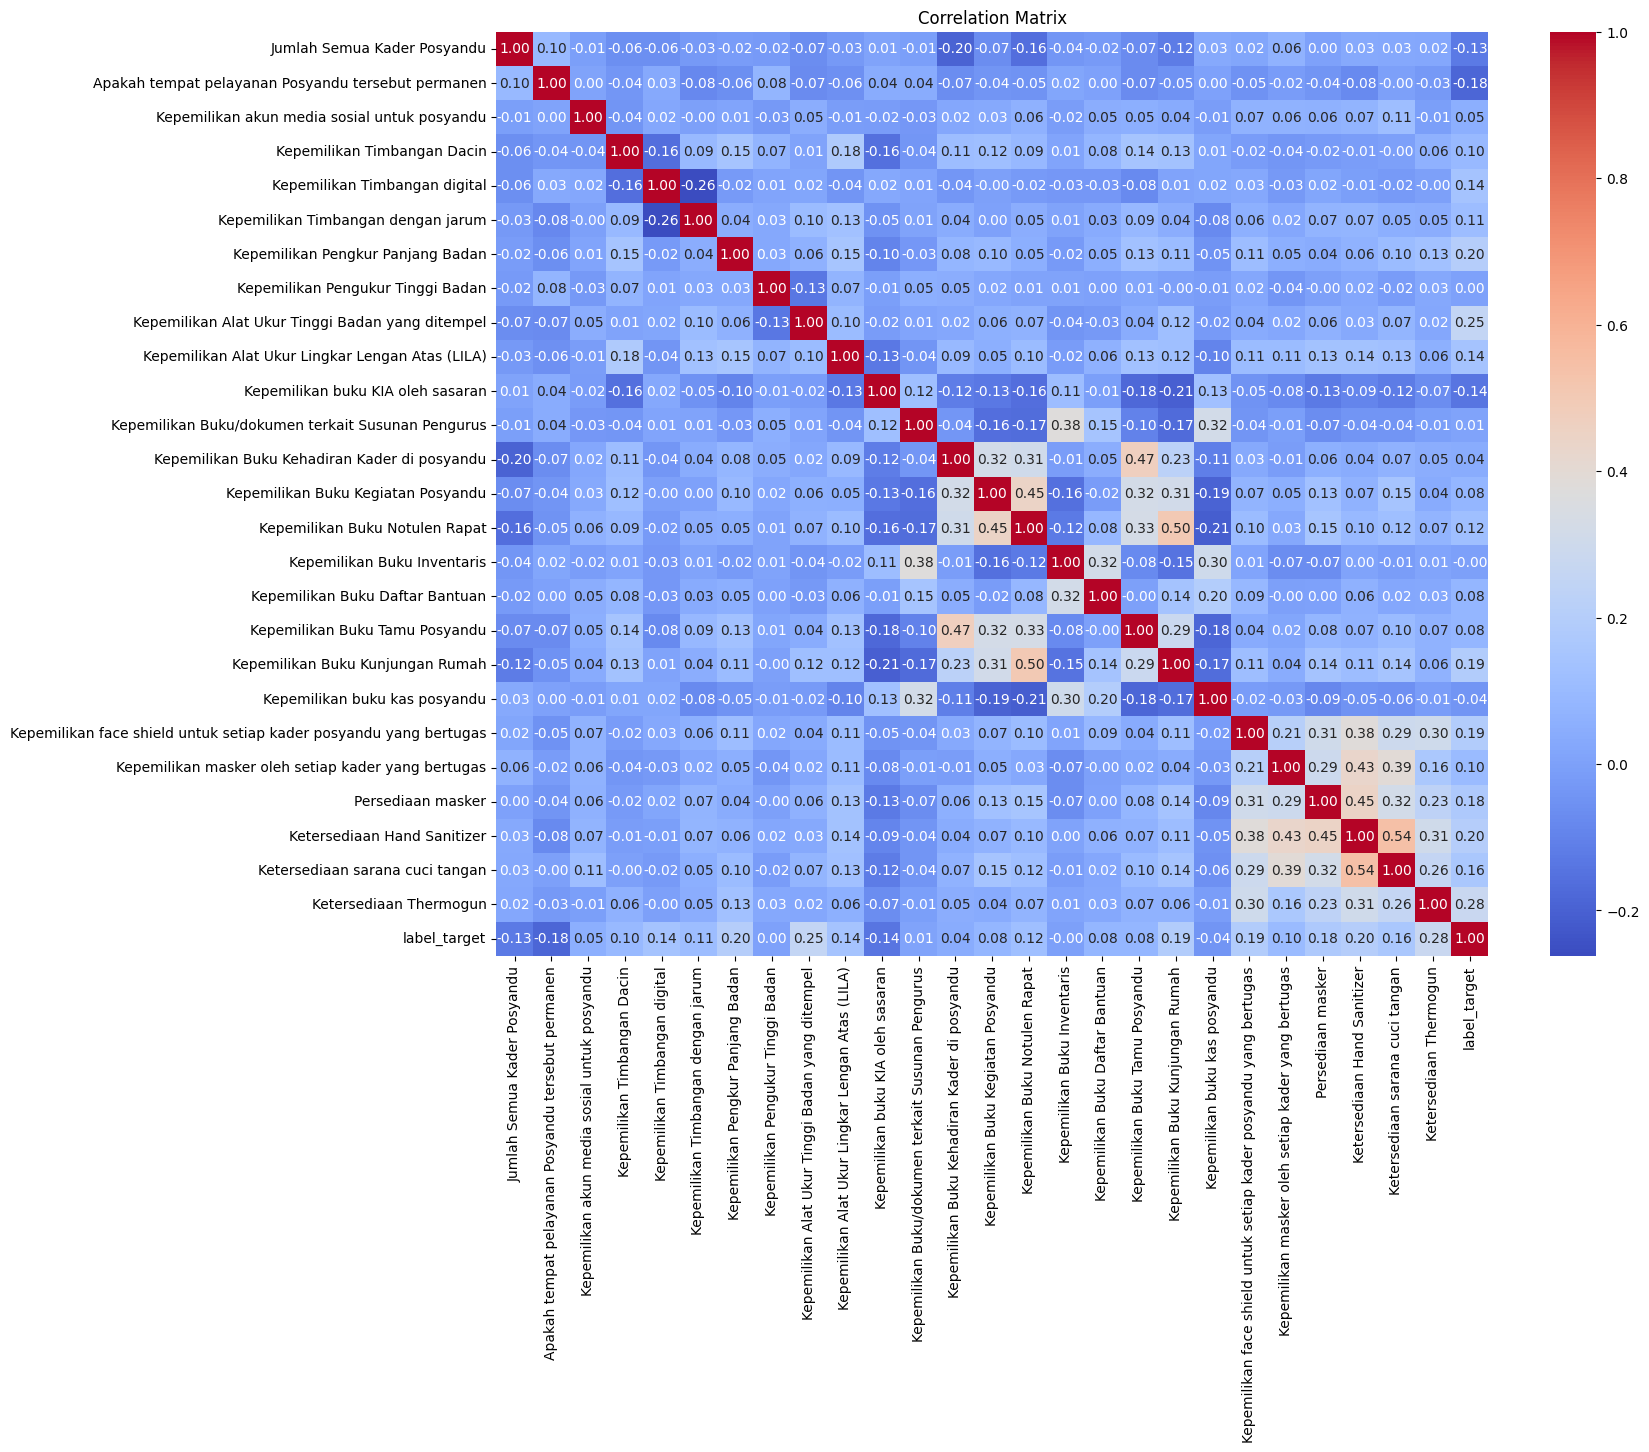

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation matrix
plt.figure(figsize=(16, 12))
correlation_matrix = df_combined.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

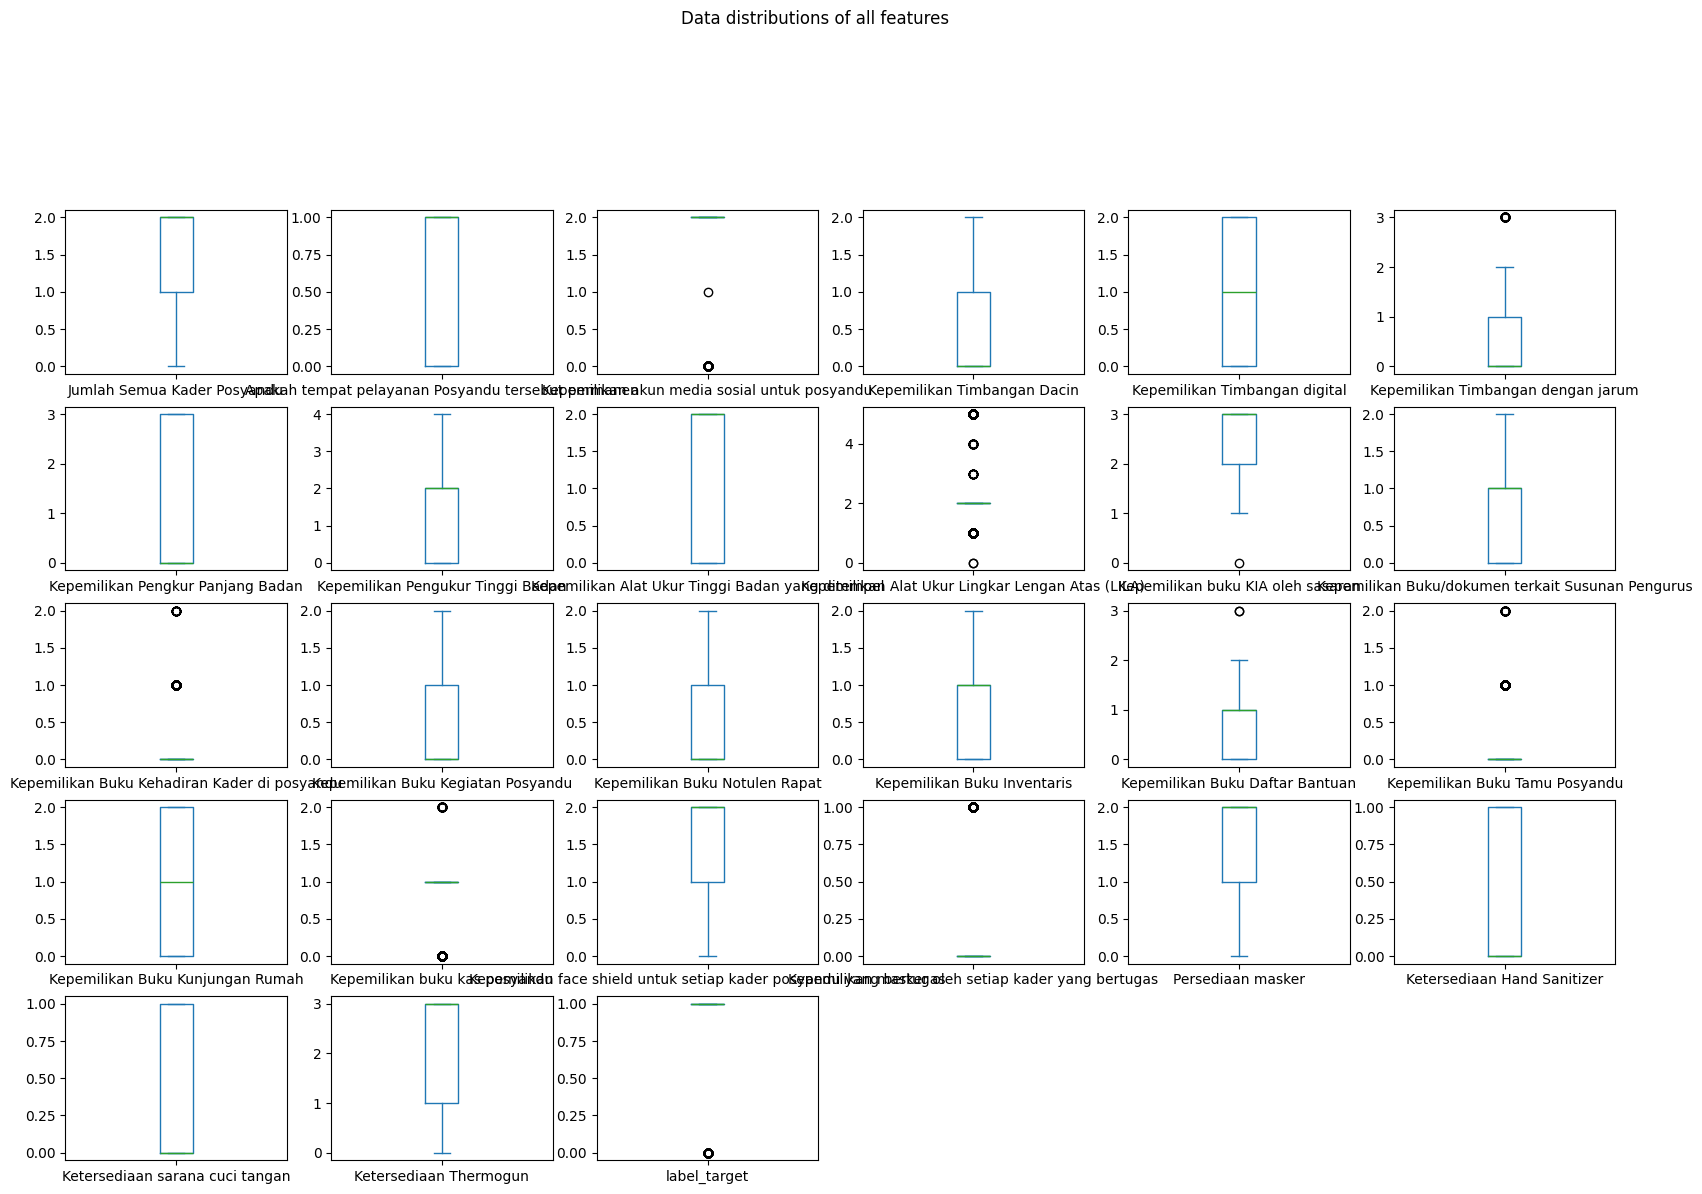

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Adjust the layout to accommodate the number of columns in your dataset
df_combined.plot(kind='box', subplots=True, layout=(8,6), sharex=False, figsize=(20, 20),
        title='Data distributions of all features')
plt.show()

# **5. DATA CONSTRUCTION**

In [ ]:
dataClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 26 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Jumlah Semua Kader Posyandu                                        1529 non-null   object
 1   Apakah tempat pelayanan Posyandu tersebut permanen                 1529 non-null   object
 2   Kepemilikan akun media sosial untuk posyandu                       1529 non-null   object
 3   Kepemilikan Timbangan Dacin                                        1529 non-null   object
 4   Kepemilikan Timbangan digital                                      1529 non-null   object
 5   Kepemilikan Timbangan dengan jarum                                 1529 non-null   object
 6   Kepemilikan Pengkur Panjang Badan                                  1529 non-null   object
 7   Kepemilikan Pengukur Tinggi Badan

## **5.1 Data Oversampling with SMOTE**

In [ ]:
X = df_combined.drop('label_target', axis=1)  # Features
y = df_combined['label_target']

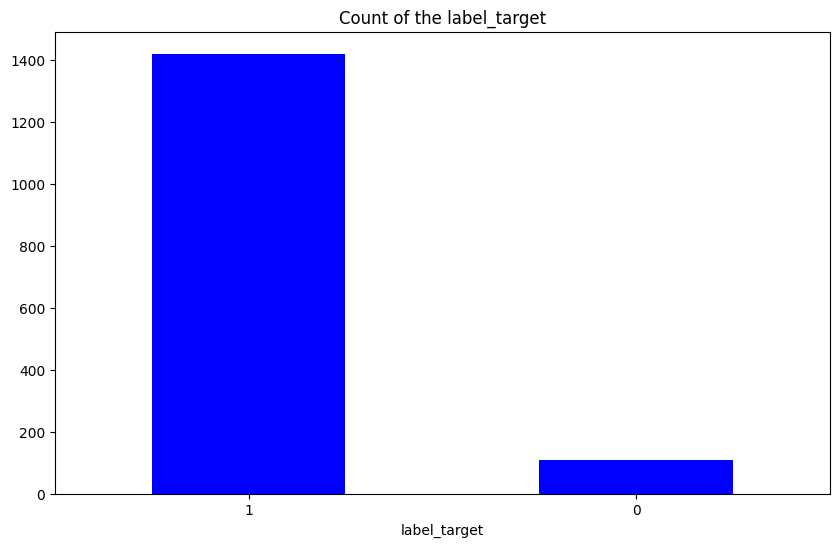

In [ ]:
df_combined['label_target'].value_counts().plot(kind='bar',figsize=(10,6),color=['blue'])
plt.title("Count of the label_target")
plt.xticks(rotation=0);

In [ ]:
from imblearn.over_sampling import SMOTE

# Oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

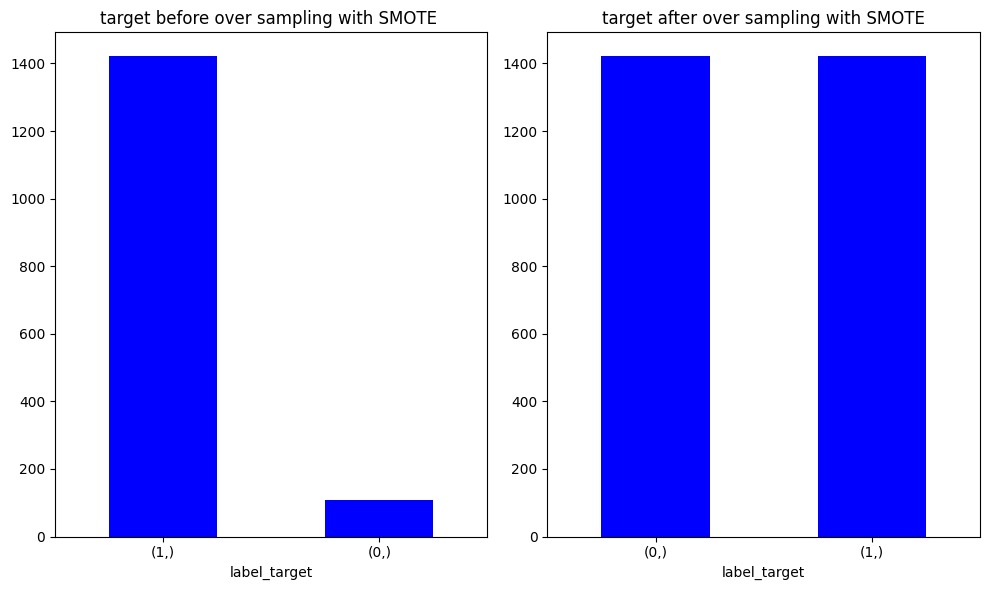

In [ ]:
plt.figure(figsize=(12, 4))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['blue'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);


plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)


new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['blue'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

#**6. Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

#**7. MODELLING**

##**7.1 Modelling for SMOTE**

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
              }

    return print(metric_dict)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report

### **7.1.1 Decision Tree**

In [ ]:
# Membuat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)  # Atur parameter sesuai kebutuhan

# Melatih model Decision Tree dengan data pelatihan
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Menggunakan model Decision Tree untuk membuat prediksi
y_pred_dt = dt_model.predict(X_test)

# Mengevaluasi model Decision Tree
print("Decision Tree Model:")
accuracy_dt = round(accuracy_score(y_test, y_pred_dt), 3)
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
# Menampilkan parameter default yang digunakan oleh model
print("Default Parameters of Decision Tree:")
print(dt_model.get_params())

Decision Tree Model:
Accuracy: 0.968
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       285
           1       0.98      0.95      0.97       284

    accuracy                           0.97       569
   macro avg       0.97      0.97      0.97       569
weighted avg       0.97      0.97      0.97       569

Default Parameters of Decision Tree:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [ ]:
evaluation(y_test,y_pred_dt)

{'accuracy': 0.968, 'recall': 0.968, 'F1 score': 0.968, 'Precision score': 0.969}


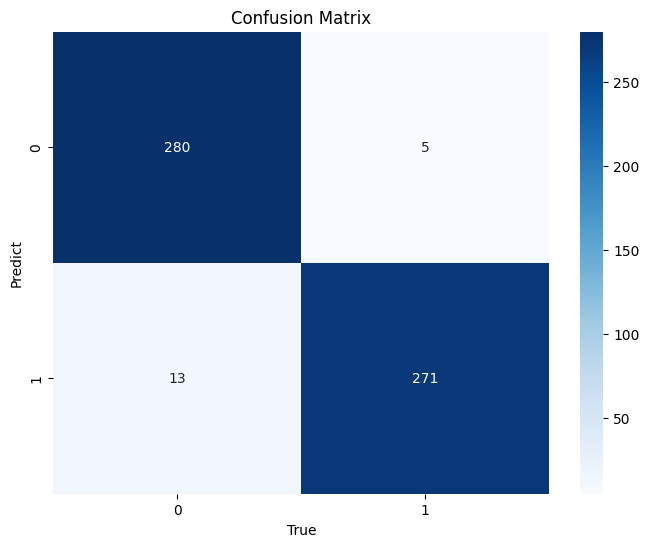

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [ ]:
pip install tabulate

In [ ]:
from tabulate import tabulate
# Mengambil fitur penting dari model
feature_importances = dt_model.feature_importances_

# Membuat DataFrame untuk fitur dan nilai pentingnya
features = X_train.columns  # Pastikan X_train adalah DataFrame dengan nama kolom
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Mengurutkan DataFrame berdasarkan nilai penting
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan tabel ranking fitur berdasarkan nilai gain
print("\nFeature Importance Ranking:")
print(tabulate(importance_df, headers='keys', tablefmt='pretty', showindex=False))


Feature Importance Ranking:
+-------------------------------------------------------------------+-----------------------+
|                              Feature                              |      Importance       |
+-------------------------------------------------------------------+-----------------------+
| Kepemilikan face shield untuk setiap kader posyandu yang bertugas |  0.46563878144069093  |
|                 Kepemilikan Pengkur Panjang Badan                 |  0.09614570182913419  |
|         Kepemilikan Alat Ukur Tinggi Badan yang ditempel          |  0.07000417080233139  |
|                 Kepemilikan Buku Kunjungan Rumah                  |  0.04853757339683647  |
|         Kepemilikan Buku/dokumen terkait Susunan Pengurus         |  0.04547734316043917  |
|                      Ketersediaan Thermogun                       | 0.040896276328529914  |
|                  Kepemilikan Buku Daftar Bantuan                  | 0.030950769450584954  |
|                   Kepemilikan

### **Download visualisasi dari Decision Tree**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import graphviz

# Langkah 5: Memvisualisasikan pohon Decision Tree
dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=X.columns,
                           class_names=label_encoder.classes_,  # Gunakan kelas dari label encoder
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree1")  # Menyimpan sebagai file PDF
graph.view()  # Menampilkan visualisasi

'decision_tree1.pdf'